In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('btcn.csv')

In [3]:
dataset

,1528968660,6489.549805
0,1528968720,6487.379883
1,1528968780,6479.410156
2,1528968840,6479.410156
3,1528968900,6479.979980
4,1528968960,6480.000000
...,...,...
97718,1535214960,6713.140137
97719,1535215020,6714.520020
97720,1535215080,6714.520020
97721,1535215140,6715.000000


In [4]:
training_set = dataset.iloc[:50000, 1:2].values

In [5]:
training_set

array([[6487.379883],
       [6479.410156],
       [6479.410156],
       ...,
       [7343.990234],
       [7344.      ],
       [7344.      ]])

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []
for i in range(20, 50000):
    X_train.append(training_set_scaled[i-20:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
X_train

array([[[0.39356008],
        [0.38913784],
        [0.38913784],
        ...,
        [0.39223953],
        [0.39223953],
        [0.39500851]],

       [[0.38913784],
        [0.38913784],
        [0.38945402],
        ...,
        [0.39223953],
        [0.39500851],
        [0.39299409]],

       [[0.38913784],
        [0.38945402],
        [0.38946513],
        ...,
        [0.39500851],
        [0.39299409],
        [0.39349343]],

       ...,

       [[0.85862198],
        [0.85845563],
        [0.85778966],
        ...,
        [0.86888185],
        [0.86888185],
        [0.86887643]],

       [[0.85845563],
        [0.85778966],
        [0.85778424],
        ...,
        [0.86888185],
        [0.86887643],
        [0.86887643]],

       [[0.85778966],
        [0.85778424],
        [0.85778966],
        ...,
        [0.86887643],
        [0.86887643],
        [0.86888185]]])

In [10]:
X_train.shape

(49980, 20, 1)

In [11]:
from keras.models import Sequential

Using TensorFlow backend.


In [12]:
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [13]:
regressor = Sequential()


In [14]:
#Input gate of LSTM
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [15]:
#Forget gate of LSTM
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
#Output gate of LSTM
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [17]:
#Candidate state of LSTM
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
#Output Layer
regressor.add(Dense(units = 1))

In [19]:
#compile the model
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [20]:
#Fitting LSTM to the training set
history=regressor.fit(X_train, y_train, epochs = 60, batch_size = 8 ,validation_split=0.02)

Train on 48980 samples, validate on 1000 samples
Epoch 1/60
48980/48980 [==============================] - 687s 14ms/step - loss: 8.5843e-04 - val_loss: 0.0012
Epoch 2/60
48980/48980 [==============================] - 803s 16ms/step - loss: 3.7493e-04 - val_loss: 6.8269e-05
Epoch 3/60
48980/48980 [==============================] - 783s 16ms/step - loss: 3.4143e-04 - val_loss: 0.0059
Epoch 4/60
48980/48980 [==============================] - 817s 17ms/step - loss: 3.0632e-04 - val_loss: 0.0029
Epoch 5/60
48980/48980 [==============================] - 769s 16ms/step - loss: 2.8339e-04 - val_loss: 5.8036e-04
Epoch 6/60
48980/48980 [==============================] - 856s 17ms/step - loss: 2.7414e-04 - val_loss: 5.0158e-04
Epoch 7/60
48980/48980 [==============================] - 789s 16ms/step - loss: 2.6611e-04 - val_loss: 4.9504e-04
Epoch 8/60
48980/48980 [==============================] - 785s 16ms/step - loss: 2.4860e-04 - val_loss: 2.0939e-04
Epoch 9/60
48980/48980 [===================

In [40]:
#Prediction on test set
#To pridict other values the range of test set can be changed according to need
dataset_test=dataset.iloc[75000:, 1:2].values
y_test=dataset.iloc[75000:, 1:2].values
dataset_test=pd.DataFrame(dataset_test)
dataset_train=pd.DataFrame(training_set)

In [41]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values

In [42]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20,22690):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

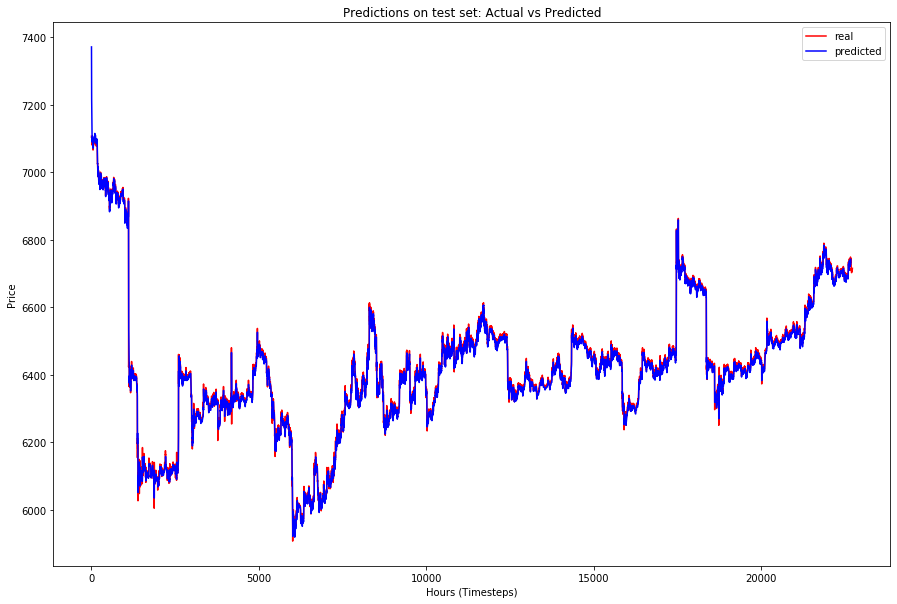

In [48]:
#visualization
plt.figure(figsize = (15,10))
plt.title('Predictions on test set: Actual vs Predicted')
plt.xlabel('Hours (Timesteps)')
plt.ylabel('Price')
plt.plot(y_test, color = 'red', label="real" )
plt.plot(predicted, color = 'blue', label="predicted")
plt.legend()


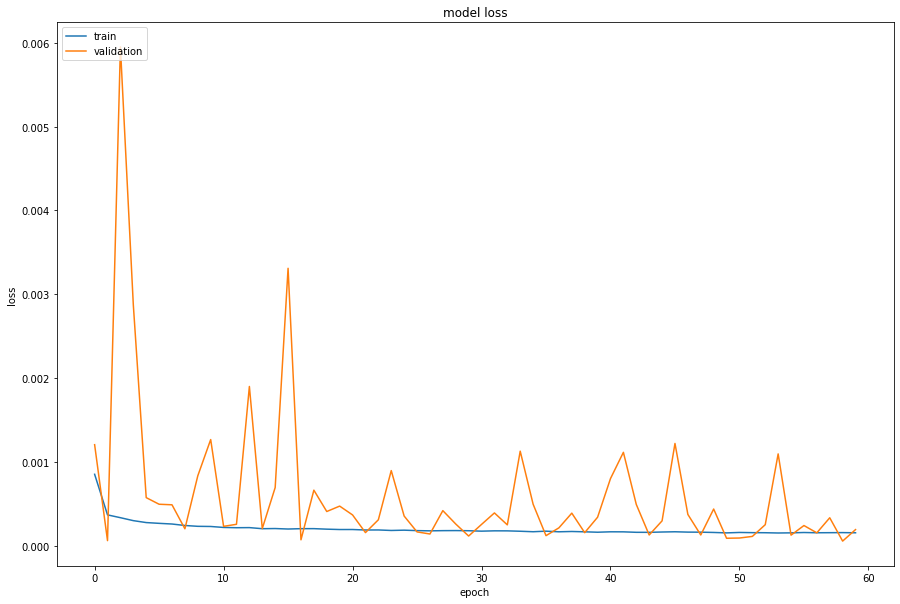

In [45]:
plt.figure(figsize = (15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [49]:
#Prediction
dataset_test=dataset.iloc[85000:, 1:2].values
y_test=dataset.iloc[85000:, 1:2].values
dataset_test=pd.DataFrame(dataset_test)
dataset_train=pd.DataFrame(training_set)

In [50]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values

In [51]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20,12690):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

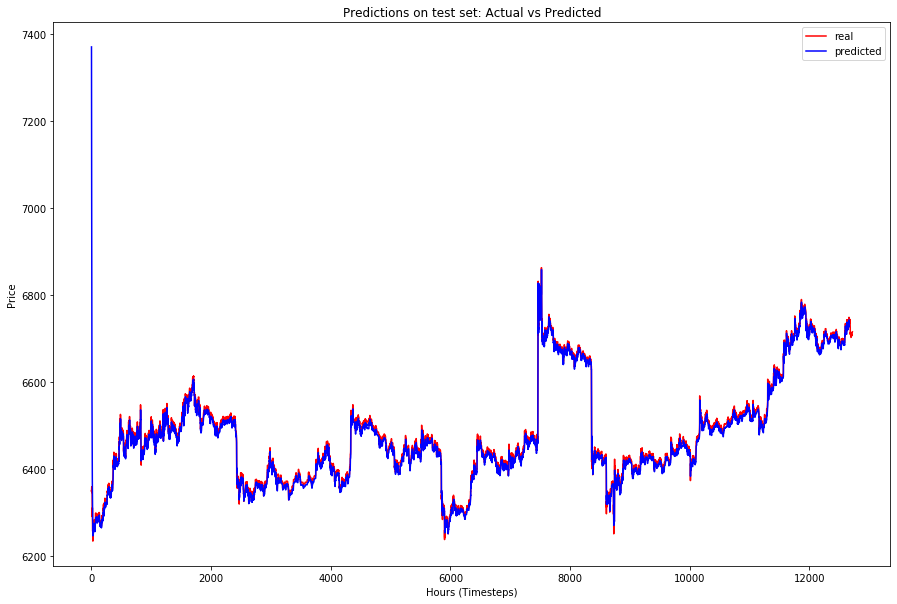

In [52]:
#visualization
plt.figure(figsize = (15,10))
plt.title('Predictions on test set: Actual vs Predicted')
plt.xlabel('Hours (Timesteps)')
plt.ylabel('Price')
plt.plot(y_test, color = 'red', label="real" )
plt.plot(predicted, color = 'blue', label="predicted")
plt.legend()

In [53]:
#Prediction
dataset_test=dataset.iloc[90000:, 1:2].values
y_test=dataset.iloc[90000:, 1:2].values
dataset_test=pd.DataFrame(dataset_test)
dataset_train=pd.DataFrame(training_set)

In [54]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values

In [55]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20,7690):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

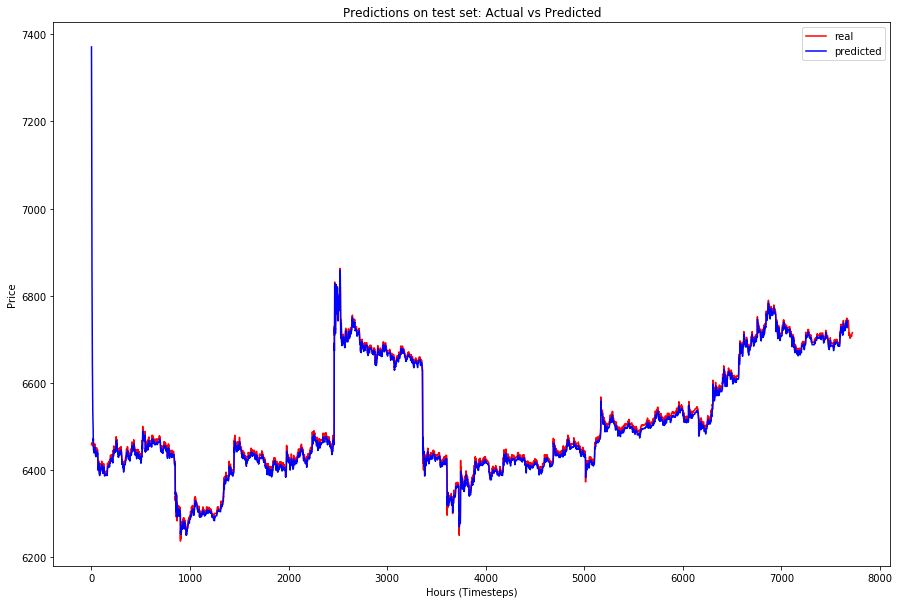

In [56]:
#visualization
plt.figure(figsize = (15,10))
plt.title('Predictions on test set: Actual vs Predicted')
plt.xlabel('Hours (Timesteps)')
plt.ylabel('Price')
plt.plot(y_test, color = 'red', label="real" )
plt.plot(predicted, color = 'blue', label="predicted")
plt.legend()

In [57]:
#Prediction
dataset_test=dataset.iloc[95000:, 1:2].values
y_test=dataset.iloc[95000:, 1:2].values
dataset_test=pd.DataFrame(dataset_test)
dataset_train=pd.DataFrame(training_set)

In [58]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values

In [59]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20,2690):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

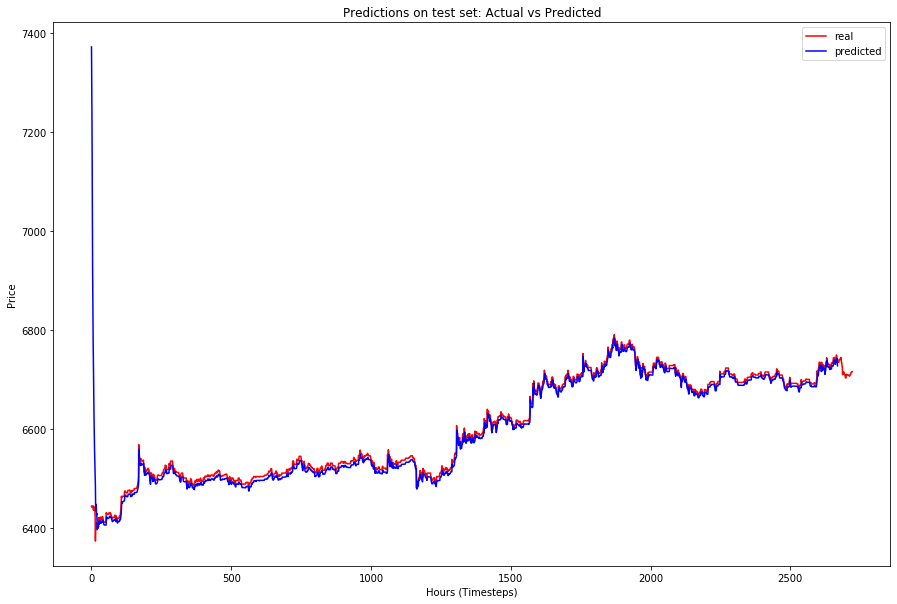

In [60]:
#visualization
plt.figure(figsize = (15,10))
plt.title('Predictions on test set: Actual vs Predicted')
plt.xlabel('Hours (Timesteps)')
plt.ylabel('Price')
plt.plot(y_test, color = 'red', label="real" )
plt.plot(predicted, color = 'blue', label="predicted")
plt.legend()

In [61]:
#Prediction
dataset_test=dataset.iloc[75000:76000, 1:2].values
y_test=dataset.iloc[75000:76000, 1:2].values
dataset_test=pd.DataFrame(dataset_test)
dataset_train=pd.DataFrame(training_set)

In [62]:
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 20:].values

In [63]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(20,1000):
    X_test.append(inputs[i-20:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = regressor.predict(X_test)
predicted = sc.inverse_transform(predicted)

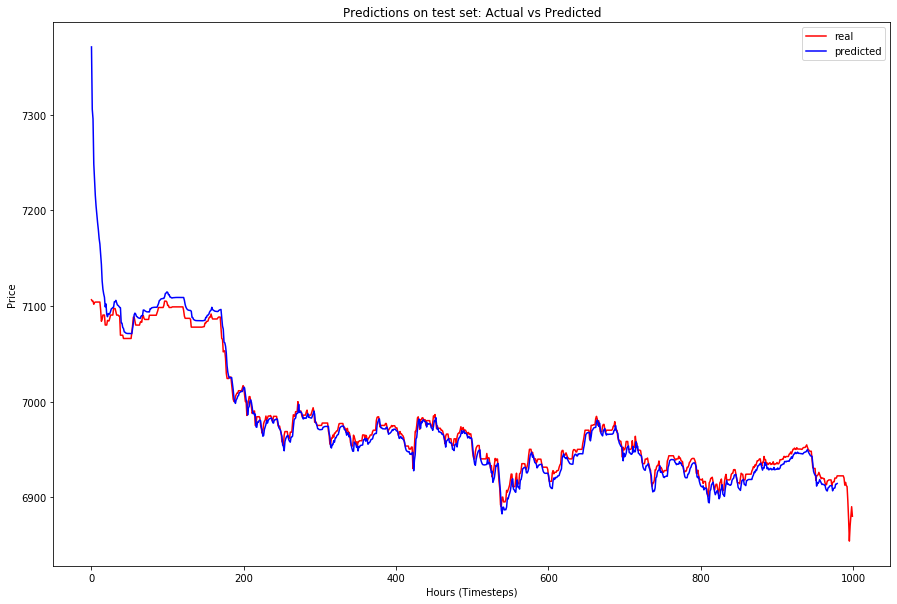

In [64]:
#visualization
plt.figure(figsize = (15,10))
plt.title('Predictions on test set: Actual vs Predicted')
plt.xlabel('Hours (Timesteps)')
plt.ylabel('Price')
plt.plot(y_test, color = 'red', label="real" )
plt.plot(predicted, color = 'blue', label="predicted")
plt.legend()

In [74]:
from math import sqrt
import metrics
from sklearn.metrics import mean_squared_error

ModuleNotFoundError: No module named 'metrics'

In [65]:
score = np.sqrt(metrics.mean_squared_error(predited,y))

NameError: name 'metrics' is not defined

In [66]:
from sklearn.metrics import mean_squared_error

from math import sqrt
import metrices

rmse = sqrt(mean_squared_error(X_test, predicted))

print(rmse)

ValueError: Found array with dim 3. Estimator expected <= 2.

In [70]:
import os
import tensorflow

In [71]:
regressor.save(os.path.join(save_path, "network.h5"))

NameError: name 'save_path' is not defined

In [75]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"

KeyError: 'acc'

In [76]:
regressor.evaluate(X, Y)

NameError: name 'X' is not defined

In [78]:
import sklearn
predictions = regressor.predict(X_test)
mse = sklearn.metrics.mean_squared_error(X_test, predictions)
print("RMSE: %s" % math.sqrt(mse))

ValueError: Found array with dim 3. Estimator expected <= 2.

In [1]:
#visualization
plt.figure(figsize = (15,10))
plt.title('Predictions on test set: Actual vs Predicted')
plt.xlabel('Hours (Timesteps)')
plt.ylabel('Price')
plt.plot(y_test, color = 'red', label="real" )
plt.plot(predicted, color = 'blue', label="predicted")
plt.legend()

NameError: name 'plt' is not defined